In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
np.random.seed(0)
def generate_dataset(n_samples=1000):
    X = []
    Y = []
    centers = [[0,2],[2,1],[1,-1],[-1,-1],[-2,1]]
    per = n_samples // len(centers)

    for i, c in enumerate(centers):
        x = np.random.randn(per, 2) * 0.5 + c
        y = np.full((per,), i)
        X.append(x)
        Y.append(y)

    X = np.vstack(X)
    Y = np.hstack(Y)

    idx = np.random.permutation(len(X))
    return X[idx], Y[idx]

In [52]:
def one_hot(y, num_classes=5):
    oh = np.zeros((y.size, num_classes))
    oh[np.arange(y.size), y] = 1
    return oh

def train_test_split_manual(X, Y, test_ratio=0.2):
    idx = np.arange(len(X))
    np.random.shuffle(idx)
    split = int(len(X) * (1 - test_ratio))
    return X[:split], X[split:], Y[:split], Y[split:]

def softmax(z):
    z = z - np.max(z, axis=1, keepdims=True)
    e = np.exp(z)
    return e / np.sum(e, axis=1, keepdims=True)

def cross_entropy(probs, y_onehot):
    eps = 1e-12
    return -np.mean(np.sum(y_onehot * np.log(probs + eps), axis=1))

In [53]:
class NeuralNetwork:
    def __init__(self, lr=0.01):
        input_layer = 2
        h1 = 64
        h2 = 32
        h3 = 16
        out_layer = 5
        self.lr = lr

        # He initialization
        self.W1 = np.random.randn(input_layer, h1) * np.sqrt(2 / input_layer)
        self.b1 = np.zeros((1, h1))
        self.W2 = np.random.randn(h1, h2) * np.sqrt(2 / h1)
        self.b2 = np.zeros((1, h2))
        self.W3 = np.random.randn(h2, h3) * np.sqrt(2 / h2)
        self.b3 = np.zeros((1, h3))
        self.W4 = np.random.randn(h3, out_layer) * np.sqrt(2 / h3)
        self.b4 = np.zeros((1, out_layer))

    # ReLU was chosen for better performance
    def relu(self, x):
        return np.maximum(0, x)

    def relu_deriv(self, z):
        return (z > 0).astype(float)

    def feedForward(self, X):
        self.X = X
        self.z1 = X.dot(self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = self.a1.dot(self.W2) + self.b2
        self.a2 = self.relu(self.z2)
        self.z3 = self.a2.dot(self.W3) + self.b3
        self.a3 = self.relu(self.z3)
        self.z4 = self.a3.dot(self.W4) + self.b4
        self.pred = softmax(self.z4)
        return self.pred

    def backPropagation(self, Y):
        m = Y.shape[0]
        dz4 = (self.pred - Y) / m
        dW4 = self.a3.T.dot(dz4)
        db4 = np.sum(dz4, axis=0, keepdims=True)
        da3 = dz4.dot(self.W4.T)
        dz3 = da3 * self.relu_deriv(self.z3)
        dW3 = self.a2.T.dot(dz3)
        db3 = np.sum(dz3, axis=0, keepdims=True)
        da2 = dz3.dot(self.W3.T)
        dz2 = da2 * self.relu_deriv(self.z2)
        dW2 = self.a1.T.dot(dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)
        da1 = dz2.dot(self.W2.T)
        dz1 = da1 * self.relu_deriv(self.z1)
        dW1 = self.X.T.dot(dz1)
        db1 = np.sum(dz1, axis=0, keepdims=True)

        self.W4 -= self.lr * dW4
        self.b4 -= self.lr * db4
        self.W3 -= self.lr * dW3
        self.b3 -= self.lr * db3
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1

    def train(self, X, Y):
        pred = self.feedForward(X)
        loss = cross_entropy(pred, Y)
        self.backPropagation(Y)
        return loss

    def predict(self, X):
        return np.argmax(self.feedForward(X), axis=1)

###Modification made to the code:
*   One more hidden layer was added
*   Activation function changed to ReLU
*   Output layer changed from 1 neuron to 5 neurons
*   Softmax activation added in the output layer
*   Loss function changed from MSE to Categorical Cross Entropy
*   Biases added for all layers
*   He Initialization applied

In [54]:
X, Y = generate_dataset(1000)
X_train, X_test, y_train, y_test = train_test_split_manual(X, Y, 0.2)

mean = X_train.mean(axis=0, keepdims=True)
std = X_train.std(axis=0, keepdims=True) + 1e-8
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

y_train_oh = one_hot(y_train)
y_test_oh = one_hot(y_test)

Epoch 0 | Loss=1.755 | Train Accuracy=0.217 | Test Accuracy=0.190
Epoch 400 | Loss=0.097 | Train Accuracy=0.979 | Test Accuracy=0.965
Epoch 800 | Loss=0.074 | Train Accuracy=0.978 | Test Accuracy=0.965
Epoch 1200 | Loss=0.068 | Train Accuracy=0.978 | Test Accuracy=0.960
Epoch 1600 | Loss=0.065 | Train Accuracy=0.979 | Test Accuracy=0.955
Epoch 2000 | Loss=0.063 | Train Accuracy=0.979 | Test Accuracy=0.955
Epoch 2400 | Loss=0.062 | Train Accuracy=0.979 | Test Accuracy=0.955
Epoch 2800 | Loss=0.061 | Train Accuracy=0.979 | Test Accuracy=0.955
Epoch 3200 | Loss=0.060 | Train Accuracy=0.979 | Test Accuracy=0.955
Epoch 3600 | Loss=0.060 | Train Accuracy=0.979 | Test Accuracy=0.955


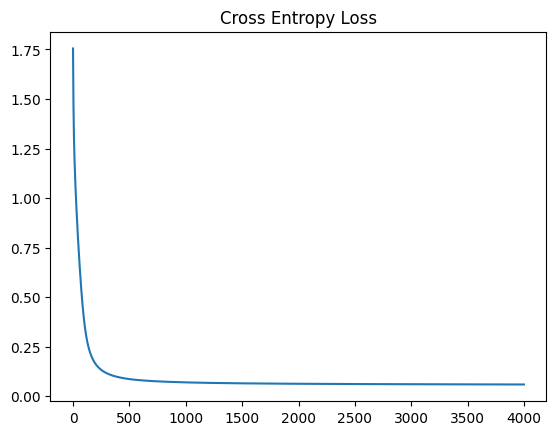

In [55]:
NN = NeuralNetwork(lr=0.01)

losses = []
epochs = 4000

for i in range(epochs):
    loss = NN.train(X_train, y_train_oh)
    losses.append(loss)

    if i % 400 == 0:
        train_acc = np.mean(NN.predict(X_train) == y_train)
        test_acc  = np.mean(NN.predict(X_test) == y_test)
        print(f"Epoch {i} | Loss={loss:.3f} | Train Accuracy={train_acc:.3f} | Test Accuracy={test_acc:.3f}")

plt.plot(losses)
plt.title("Cross Entropy Loss")
plt.show()

In [56]:
def confusion_matrix(y_true, y_pred, num_classes=5):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for t, p in zip(y_true, y_pred):
        cm[t][p] += 1
    return cm

def classification_report(cm):
    precision = []
    recall = []
    f1 = []
    for c in range(len(cm)):
        TP = cm[c][c]
        FP = cm[:,c].sum() - TP
        FN = cm[c].sum() - TP

        p = TP / (TP + FP) if (TP + FP) else 0
        r = TP / (TP + FN) if (TP + FN) else 0
        f = (2*p*r)/(p+r) if (p+r) else 0

        precision.append(p)
        recall.append(r)
        f1.append(f)
    return precision, recall, f1

y_pred = NN.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:\n", cm)

precision, recall, f1 = classification_report(cm)
for i in range(5):
    print(f"Class {i}: Precision={precision[i]:.3f}, Recall={recall[i]:.3f}, F1={f1[i]:.3f}")

print("\nOverall Accuracy:", np.mean(y_pred == y_test))


Confusion Matrix:
 [[31  1  0  0  0]
 [ 0 37  0  0  0]
 [ 0  2 47  1  0]
 [ 0  0  2 47  0]
 [ 0  0  0  3 29]]
Class 0: Precision=1.000, Recall=0.969, F1=0.984
Class 1: Precision=0.925, Recall=1.000, F1=0.961
Class 2: Precision=0.959, Recall=0.940, F1=0.949
Class 3: Precision=0.922, Recall=0.959, F1=0.940
Class 4: Precision=1.000, Recall=0.906, F1=0.951

Overall Accuracy: 0.955


### Result and analysis
1. The loss curve shows how this loss decreases over time as the neural network learns from the training data, indicating that the model is improving.
2. Training Accuracy: 0.979
3. Testing Accuracy: 0.955


### Conclusion
This assignment successfully extended the XOR based neural network into a three hidden layer multi class classifier.

### Main Findings
*   The final model achieved 95% accuracy on the test set.
*   The loss consistently decreased, confirming stable optimization.
*   The confusion matrix showed that most classes learned well with minor misclassifications for overlapping clusters.
### Challenges and Lesson Learned
*   Adding biases were crucial for stable training.
*   Softmax and cross entropy improved learning over the sigmoid and MSE.
### Future Improvements
*   Can add dropout or L2 regularization to reduce overfitting.
*   Can increase hidden neurons
*   Try more spread apart synthetic dataset








